In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/btc dataset/bitcoin_2017_to_2023.csv")

In [ ]:
data.head(5)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [ ]:
data['open'].value_counts()

open
3900.00     230
3950.00     183
4300.00     176
6600.00     175
4200.00     163
           ... 
54979.94      1
54956.42      1
54952.83      1
54937.49      1
36630.27      1
Name: count, Length: 1784709, dtype: int64

In [ ]:
# if you need to filter
#selected_columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

#filtered_data = data[selected_columns]

In [ ]:
data = data[['close']]

In [ ]:
dataset = data.values
dataset = dataset.astype('float32')

In [ ]:
dataset

array([[28902.49],
       [28902.49],
       [28902.49],
       ...,
       [ 4280.56],
       [ 4261.48],
       [ 4261.48]], dtype=float32)

In [ ]:
# prompt: minmaxScale

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
scaled_data


array([[0.39414185],
       [0.39414185],
       [0.39414185],
       ...,
       [0.02211383],
       [0.02182554],
       [0.02182554]], dtype=float32)

In [ ]:
# prompt: divide the data for taining and testing

train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]


In [ ]:
# prompt: # convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [ ]:
# prompt: look_back = 10
look_back = 10
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)


In [ ]:
x_train

array([[0.39414185, 0.39414185, 0.39414185, ..., 0.3939477 , 0.3938253 ,
        0.3937416 ],
       [0.39414185, 0.39414185, 0.3942331 , ..., 0.3938253 , 0.3937416 ,
        0.3936884 ],
       [0.39414185, 0.3942331 , 0.39421618, ..., 0.3937416 , 0.3936884 ,
        0.3937165 ],
       ...,
       [0.05563634, 0.05561096, 0.05564133, ..., 0.05561896, 0.05561231,
        0.05559479],
       [0.05561096, 0.05564133, 0.05562123, ..., 0.05561231, 0.05559479,
        0.0555759 ],
       [0.05564133, 0.05562123, 0.05558829, ..., 0.05559479, 0.0555759 ,
        0.0555753 ]], dtype=float32)

In [ ]:
y_train

array([0.3936884 , 0.3937165 , 0.39368492, ..., 0.0555759 , 0.0555753 ,
       0.0555407 ], dtype=float32)

In [ ]:
# prompt: # reshape input to be [samples, time steps, features]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
# prompt: Build our Model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)


Epoch 1/10
25008/25008 - 145s - loss: 4.4371e-05 - 145s/epoch - 6ms/step
Epoch 2/10
25008/25008 - 131s - loss: 1.4104e-06 - 131s/epoch - 5ms/step
Epoch 3/10
25008/25008 - 133s - loss: 8.3883e-07 - 133s/epoch - 5ms/step
Epoch 4/10
25008/25008 - 130s - loss: 6.5381e-07 - 130s/epoch - 5ms/step
Epoch 5/10
25008/25008 - 131s - loss: 5.7935e-07 - 131s/epoch - 5ms/step
Epoch 6/10
25008/25008 - 130s - loss: 5.4243e-07 - 130s/epoch - 5ms/step
Epoch 7/10
25008/25008 - 131s - loss: 5.0664e-07 - 131s/epoch - 5ms/step
Epoch 8/10
25008/25008 - 129s - loss: 4.7619e-07 - 129s/epoch - 5ms/step
Epoch 9/10
25008/25008 - 130s - loss: 4.6355e-07 - 130s/epoch - 5ms/step
Epoch 10/10
25008/25008 - 129s - loss: 4.4409e-07 - 129s/epoch - 5ms/step


In [ ]:
# prompt: trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
# We have to invert the predictions before calculating error to so that reports will be in same units as our original data
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

# We have to invert the predictions before calculating error to so that reports will be in same units as our original data
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])


19538/19538 [==============================] - 51s 3ms/step


In [ ]:
# prompt: trainScore and testscore

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 72.77 RMSE
Test Score: 50.01 RMSE


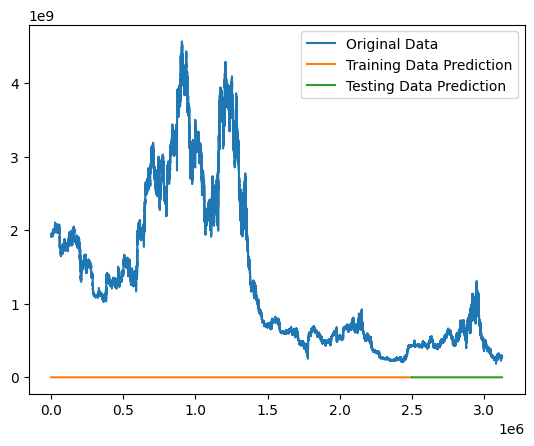

In [ ]:
# prompt: # shift train predictions for plotting

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(trainPredictPlot, label='Training Data Prediction')
plt.plot(testPredictPlot, label='Testing Data Prediction')
plt.legend()
plt.show()


In [ ]:


model.save('/content/drive/MyDrive/bitcoin_lstm_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model('/content/drive/MyDrive/bitcoin_lstm_model.h5')

# Prepare the test data
x_test = np.array([test_data[-look_back:]])
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

# Print the predictions
print(predictions)


1/1 [==============================] - 1s 1s/step
[[10089.944]]
